In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
# importing the data
data = pd.read_excel("20240110 batfly dataset.xlsx")
data.head()

,3T_,consecutive fly ID,unique 3T identifier,Bat voucher,Bat family,Bat genus,Bat species epithet,Bat species,Bat identified by,Sex,...,Day,Month,Year,Contact <email>,Comments,Screened by,Voucher slides,Isolate,Sequences,Reference
0,3T_,1,3T_00001,JJC tube # 1,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 1 {first host specimen for thalli u...,Danny Haelewaters,NaN,DH619a,"SSU, LSU",NaN
1,3T_,2,3T_00002,JJC tube # 1,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 1 {second host specimen for thalli ...,Danny Haelewaters,NaN,DH619a,"SSU, LSU",NaN
2,3T_,3,3T_00003,JJC tube # 1,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 1,Danny Haelewaters,DH599a,NaN,NaN,NaN
3,3T_,4,3T_00004,JJC tube # 2,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 2,Danny Haelewaters,NaN,NaN,NaN,NaN
4,3T_,5,3T_00005,JJC tube # 2,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 2,Danny Haelewaters,NaN,NaN,NaN,NaN


In [4]:
# Check the shape of the data (number of rows and columns)
print("Data shape:")
print(data.shape)

# Check the column names
print("\nColumn names:")
print(data.columns)

# Check the data types of each column
print("\nData types:")
print(data.dtypes)

# Check the summary statistics of the numerical columns
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Data shape:
(17986, 54)

Column names:
Index(['3T_', 'consecutive fly ID', 'unique 3T identifier', 'Bat voucher',
       'Bat family', 'Bat genus', 'Bat species epithet', 'Bat species',
       'Bat identified by', 'Sex',
       'Age (J = juvenile, A = adult, SA = subadult)',
       'Reproductive status (P = pregnant, LA = lactating, PL = post-lactating)',
       'Body mass', 'Forearm', 'Bat genetic information', 'Diet',
       'Roosting ecology', 'Bat flies?', 'Bat fly family', 'Bat fly genus',
       'Bat fly species epithet', 'Bat fly species', 'Bat fly identified by',
       'Bat fly sex', 'Bat fly ecomorphology', 'Bat fly ecology',
       'Bat fly wing', 'Laboul infection?', 'Double infection?',
       'Laboul genus 1', 'Laboul species 1', 'Position(s) infected 1',
       'Laboul genus 2', 'Laboul species 2', 'Position(s) infected 2',
       'Laboul(s) identified by', 'Country', 'Territory', 'Settlement',
       'Location', 'Open/Close', 'Latitude', 'Longitude', 'Climate zone',
   

In [5]:
# species counts
data["Bat species"].value_counts()

Bat species
Pteronotus mesoamericanus                                                          3025
Carollia perspicillata                                                             2154
Artibeus jamaicensis                                                               1729
Desmodus rotundus                                                                  1413
Miniopterus schreibersii                                                           1065
                                                                                   ... 
Rhinolophus hipposideros                                                              1
Molossus rufus                                                                        1
Lionycteris spurrelli                                                                 1
Micronycteris schmidtorum                                                             1
Artibeus lituratus (most likely cross contamination from Phyllostomus hastatus)       1
Name: count, Length:

In [6]:
# species counts
data["Laboul infection?"].value_counts()

Laboul infection?
uninfected                                                               15016
not yet checked!                                                          2237
infected                                                                   684
Uninfected                                                                  24
Unclaer                                                                      6
infected?                                                                    3
not checked (only 14 M Trichobius sp. nov. available for screening)          2
not checked (only 7 bat flies available for screening)                       2
Uninfeced                                                                    2
not screened (1 F Trichobius sp. nov. used for DNA barcoding project)        1
Name: count, dtype: int64

In [12]:
# infected bats
infected_bats = data[data["Laboul infection?"] == "infected"].sort_values(by="Laboul infection?", ascending=False)

bat_species_counts = infected_bats["Bat species"].value_counts()


infected_bats.head()

,3T_,consecutive fly ID,unique 3T identifier,Bat voucher,Bat family,Bat genus,Bat species epithet,Bat species,Bat identified by,Sex,...,Day,Month,Year,Contact <email>,Comments,Screened by,Voucher slides,Isolate,Sequences,Reference
0,3T_,1,3T_00001,JJC tube # 1,Phyllostomidae,Carollia,perspicillata,Carollia perspicillata,NaN,F,...,NaN,NaN,2014,Jasmin J. Camacho <jasminjcamacho@gmail.com>,JJC tube # 1 {first host specimen for thalli u...,Danny Haelewaters,NaN,DH619a,"SSU, LSU",NaN
12606,3T_,12775,3T_12775,18H2,Miniopteridae,Miniopterus,schreibersii,Miniopterus schreibersii,NaN,NaN,...,6,September,2018,Tamara Szentiványi <tamaraszentivanyi@gmail.com>,NaN,Danny Haelewaters,NaN,NaN,NaN,Szentiványi et al. 2020 https://doi.org/10.118...
12592,3T_,12761,3T_12761,18H10,Miniopteridae,Miniopterus,schreibersii,Miniopterus schreibersii,NaN,NaN,...,7,September,2018,Tamara Szentiványi <tamaraszentivanyi@gmail.com>,NaN,Danny Haelewaters,NaN,NaN,NaN,Szentiványi et al. 2020 https://doi.org/10.118...
12593,3T_,12762,3T_12762,18H11,Miniopteridae,Miniopterus,schreibersii,Miniopterus schreibersii,NaN,NaN,...,7,September,2018,Tamara Szentiványi <tamaraszentivanyi@gmail.com>,NaN,Danny Haelewaters,NaN,NaN,NaN,Szentiványi et al. 2020 https://doi.org/10.118...
12595,3T_,12764,3T_12764,18H13,Miniopteridae,Miniopterus,schreibersii,Miniopterus schreibersii,NaN,NaN,...,7,September,2018,Tamara Szentiványi <tamaraszentivanyi@gmail.com>,NaN,Danny Haelewaters,NaN,NaN,NaN,Szentiványi et al. 2020 https://doi.org/10.118...


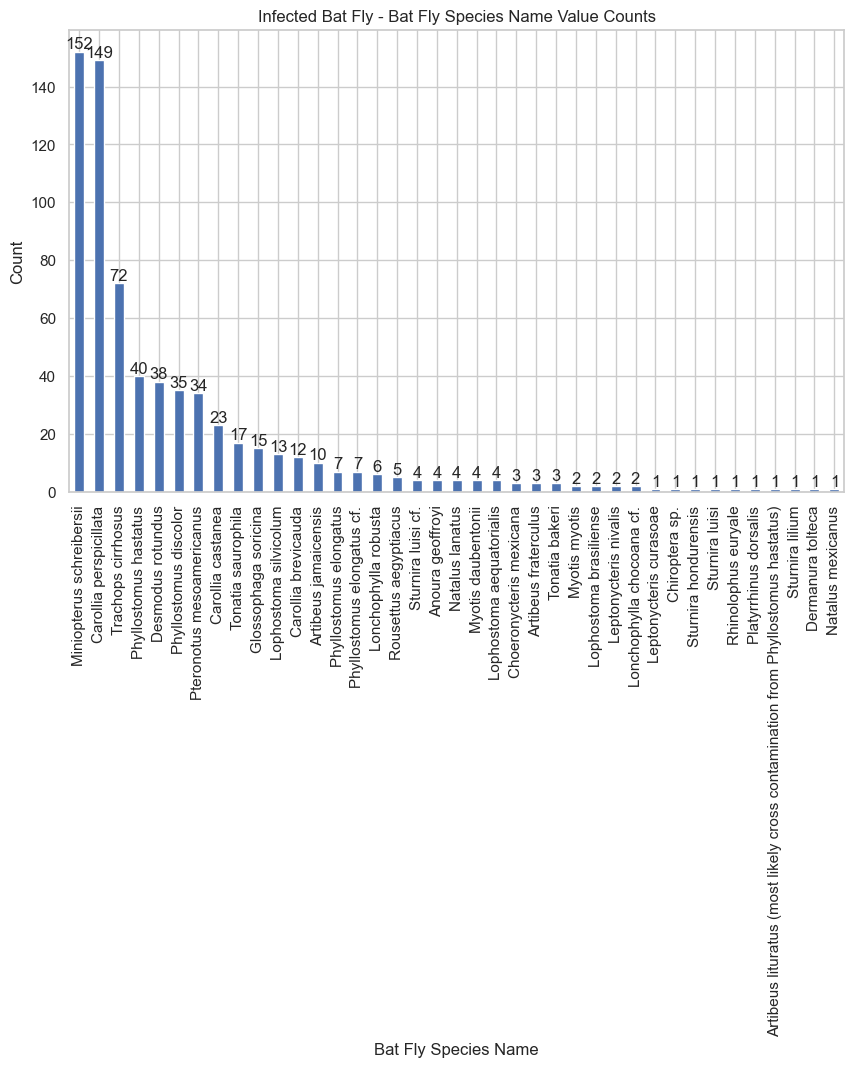

In [10]:
# Bar plot
fig, ax = plt.subplots(
    figsize=(10, 6)
)  # Set the figsize parameter to make the figure wider
bat_species_counts.plot(kind="bar", ax=ax)
plt.xlabel("Bat Fly Species Name")
plt.ylabel("Count")
plt.title("Infected Bat Fly - Bat Fly Species Name Value Counts")

# Add values above the bars
for i, v in enumerate(bat_species_counts):
    ax.text(i, v, str(v), ha="center", va="bottom")

sns.set()
sns.set_style("whitegrid")

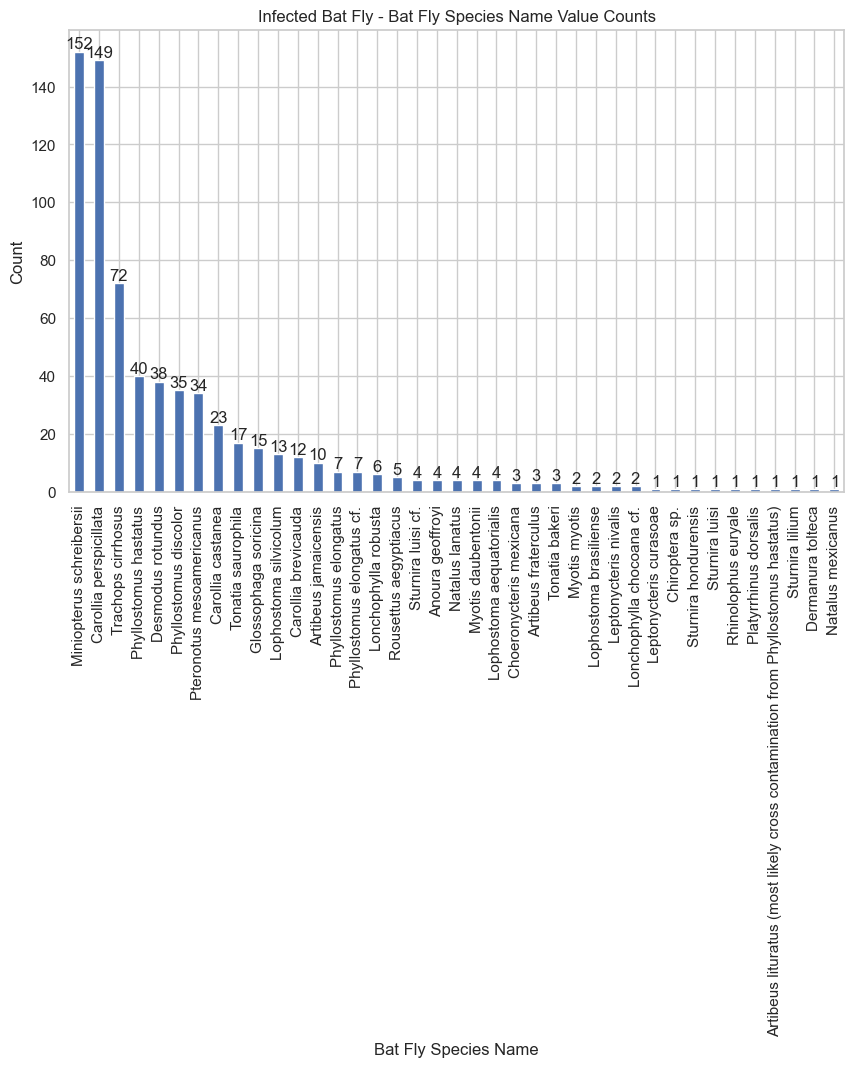

In [9]:
# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figsize parameter to make the figure wider
bat_species_counts.plot(kind="bar", ax=ax)
plt.xlabel("Bat Fly Species Name")
plt.ylabel("Count")
plt.title("Infected Bat Fly - Bat Fly Species Name Value Counts")

# Add values above the bars
for i, v in enumerate(bat_species_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

sns.set()
sns.set_style("whitegrid")


In [16]:
data.columns

Index(['3T_', 'consecutive fly ID', 'unique 3T identifier', 'Bat voucher',
       'Bat family', 'Bat genus', 'Bat species epithet', 'Bat species',
       'Bat identified by', 'Sex',
       'Age (J = juvenile, A = adult, SA = subadult)',
       'Reproductive status (P = pregnant, LA = lactating, PL = post-lactating)',
       'Body mass', 'Forearm', 'Bat genetic information', 'Diet',
       'Roosting ecology', 'Bat flies?', 'Bat fly family', 'Bat fly genus',
       'Bat fly species epithet', 'Bat fly species', 'Bat fly identified by',
       'Bat fly sex', 'Bat fly ecomorphology', 'Bat fly ecology',
       'Bat fly wing', 'Laboul infection?', 'Double infection?',
       'Laboul genus 1', 'Laboul species 1', 'Position(s) infected 1',
       'Laboul genus 2', 'Laboul species 2', 'Position(s) infected 2',
       'Laboul(s) identified by', 'Country', 'Territory', 'Settlement',
       'Location', 'Open/Close', 'Latitude', 'Longitude', 'Climate zone',
       'Day', 'Month', 'Year', 'Contact <e

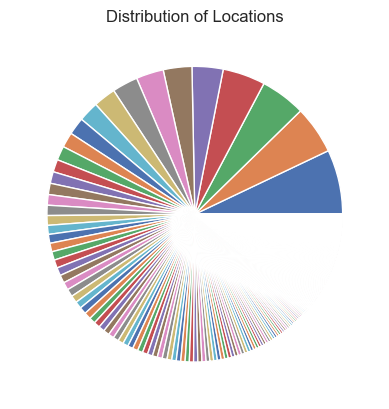

In [40]:
# Visualize the distribution of a categorical column
plt.pie(data["Location"].value_counts())
plt.title("Distribution of Locations")
plt.show()
